In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Load Titanic dataset
df = pd.read_csv('../Data/titanic.csv')
print("Saved titanic.csv | Shape:", df.shape)
df.head()



Saved titanic.csv | Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 📊 Distribution Shapes

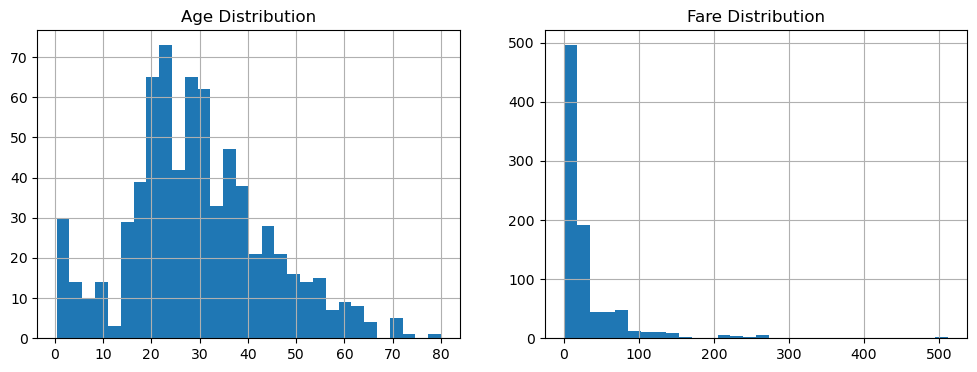

In [2]:

# Age & Fare histograms
fig, ax = plt.subplots(1,2, figsize=(12,4))
df['age'].dropna().hist(bins=30, ax=ax[0])
ax[0].set_title("Age Distribution")
df['fare'].dropna().hist(bins=30, ax=ax[1])
ax[1].set_title("Fare Distribution")
plt.show()


In [3]:

print("Age skewness:", df['age'].skew(), "kurtosis:", df['age'].kurtosis())
print("Fare skewness:", df['fare'].skew(), "kurtosis:", df['fare'].kurtosis())


Age skewness: 0.38910778230082704 kurtosis: 0.17827415364210353
Fare skewness: 4.787316519674893 kurtosis: 33.39814088089868


## 🎲 Sampling Methods

In [4]:

# Random sampling
sample_random = df.sample(10, random_state=42)
print("Random sample:\n", sample_random[['age','fare','pclass']])

# Stratified sampling by Pclass
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(df, df['pclass']):
    strat_train = df.iloc[train_idx]
    strat_test = df.iloc[test_idx]
print("Stratified Pclass distribution (train):\n", strat_train['pclass'].value_counts(normalize=True))
print("Stratified Pclass distribution (test):\n", strat_test['pclass'].value_counts(normalize=True))


Random sample:
       age     fare  pclass
709   NaN  15.2458       3
439  31.0  10.5000       2
840  20.0   7.9250       3
720   6.0  33.0000       2
39   14.0  11.2417       3
290  26.0  78.8500       1
300   NaN   7.7500       3
333  16.0  18.0000       3
208  16.0   7.7500       3
136  19.0  26.2833       1
Stratified Pclass distribution (train):
 pclass
3    0.550562
1    0.242978
2    0.206461
Name: proportion, dtype: float64
Stratified Pclass distribution (test):
 pclass
3    0.553073
1    0.240223
2    0.206704
Name: proportion, dtype: float64


## 🔄 Bootstrap Sampling

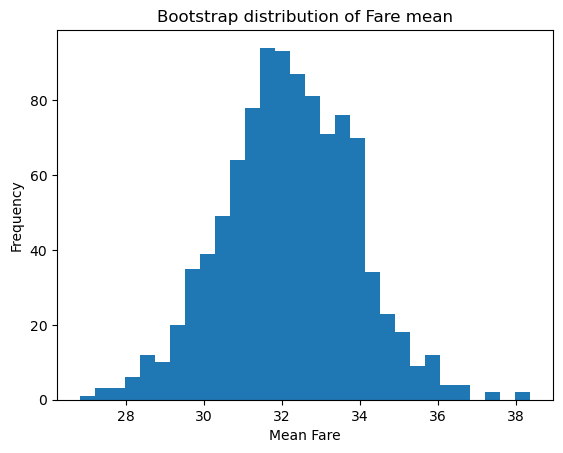

Bootstrap mean CI (95%): [28.75392054 35.58298613]


In [5]:

# Bootstrap estimate of mean Fare
n_boot = 1000
means = [df['fare'].dropna().sample(frac=1, replace=True).mean() for _ in range(n_boot)]

plt.hist(means, bins=30)
plt.title("Bootstrap distribution of Fare mean")
plt.xlabel("Mean Fare")
plt.ylabel("Frequency")
plt.show()

print("Bootstrap mean CI (95%):", np.percentile(means,[2.5,97.5]))



## 💬 Discussion (10 min)
- What bias occurs if **3rd class** is underrepresented in train data?
- How would this affect survival prediction?
- Can stratification or re-weighting help?


### Bias if 3rd class is underrepresented:
If there aren’t enough 3rd class passengers in training, the model won’t really “learn their story.” It ends up biased toward the patterns of 1st and 2nd class.

### Effect on survival prediction:
As a result, predictions for 3rd class become unreliable. The model might guess their survival chances too high or too low, missing the real picture.

### Can stratification or re-weighting help?
Yes, stratification makes sure every class is fairly included in training and testing. Re-weighting or resampling gives underrepresented groups a stronger voice in the model.


## 🏠 Homework (5 min)
Write a **sampling plan** for Titanic evaluation:
- Specify which variable(s) you stratify by (e.g., `pclass`, `sex`).
- Decide train/test proportions (e.g., 80/20).
- State how you will check for representativeness.
- Document trade-offs between fairness & performance.


## 🏠 Sampling Plan for Titanic

**1) What to stratify by**  
I will stratify by both **Pclass** (1st, 2nd, 3rd) and **Sex** (male/female).  
These two features matter a lot for survival, so each group should be fairly represented.  

**2) Train/test split**  
I’ll use **80% of the data for training** and **20% for testing**,  
with a fixed random seed so results are reproducible.  

**3) How to check representativeness**  
After splitting, I’ll check if the proportions of each group (like 3rd class females)  
are similar in train and test. If they look close, the split is fair.  

**4) Trade-offs**  
Stratifying makes evaluation more **fair** across groups, especially smaller ones.  
The trade-off is that balancing can slightly reduce raw accuracy,  
but predictions will be **more reliable and balanced** across passengers.  

---